<a href="https://colab.research.google.com/github/afk-Parth/crop-recommendation-ml/blob/main/crop_reco(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI IN AGRICULUTURE AND YIELD

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Crop_recommendation.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "siddharthss/crop-recommendation-dataset",
    file_path
)

print(df.head())


/tmp/ipython-input-1-4272107222.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 147k/147k [00:00<00:00, 19.2MB/s]

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [2]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
print(df['label'].unique())


['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [4]:
print(df.shape)
print(df.isnull().sum())


(2200, 8)
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


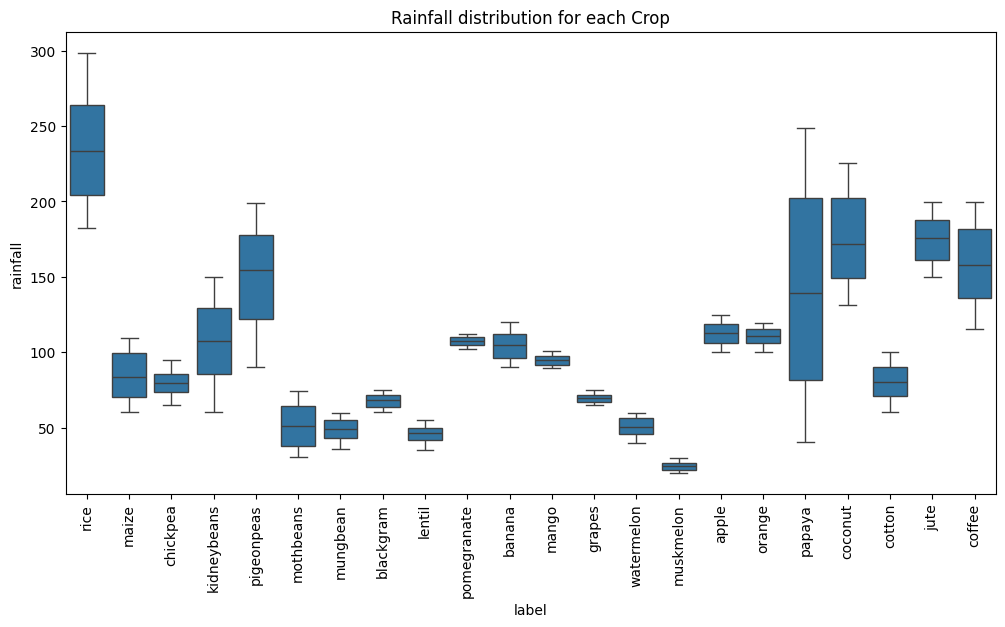

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='rainfall', data=df)
plt.xticks(rotation=90)
plt.title('Rainfall distribution for each Crop')
plt.show()


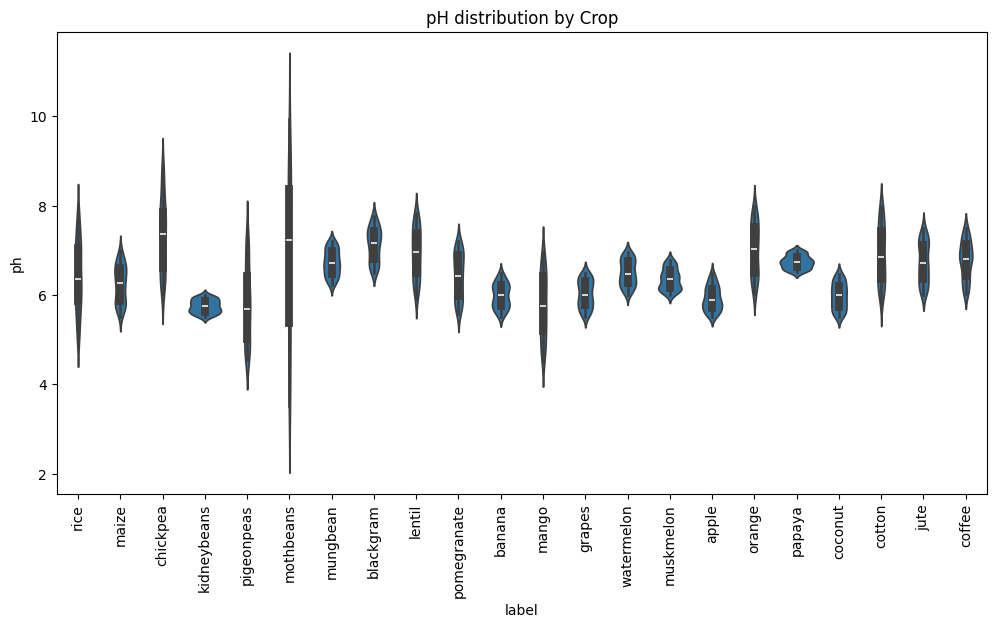

In [9]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='ph', data=df)
plt.xticks(rotation=90)
plt.title('pH distribution by Crop')
plt.show()


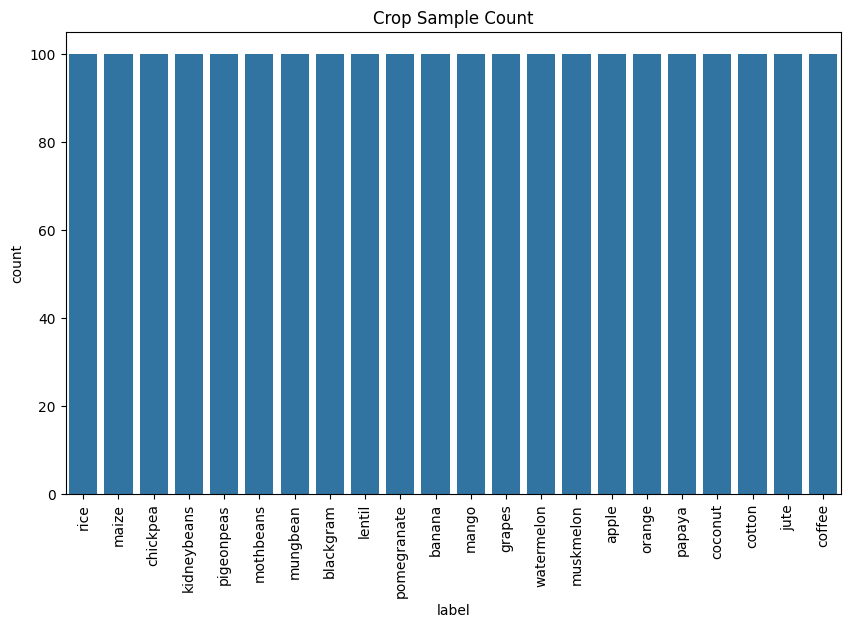

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Sample Count")
plt.show()


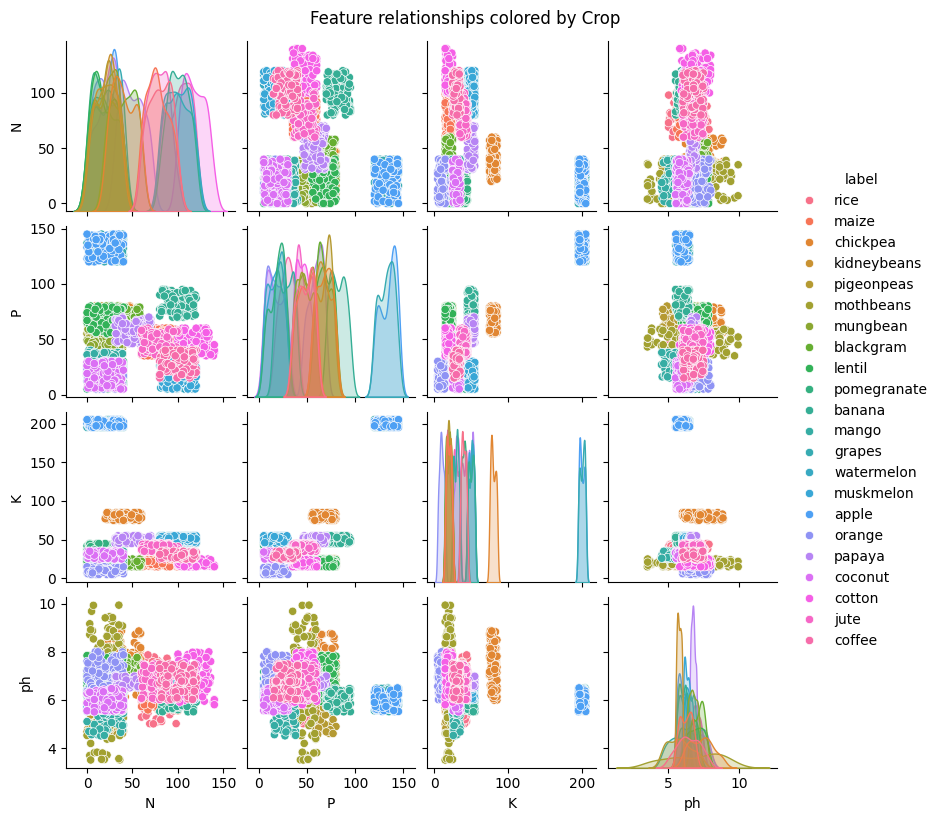

In [11]:
sns.pairplot(df, hue='label', vars=['N', 'P', 'K', 'ph'], height=2)
plt.suptitle('Feature relationships colored by Crop', y=1.02)
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [13]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9409090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.75      0.75      0.75        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.79      0.88      0.83        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.77      0.91      0.83        11
       maize       0.89      0.81      0.85        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.83      0.83      0.83        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1